<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import sklearn
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-06 16:55:48--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-05-06 16:55:48 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    seaborn-0.10.0             |             py_0         161 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2020.4.5.1-py36_0  --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

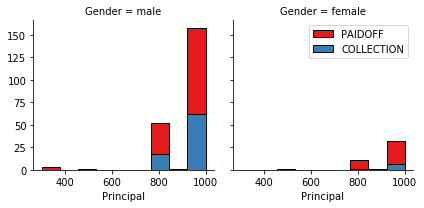

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

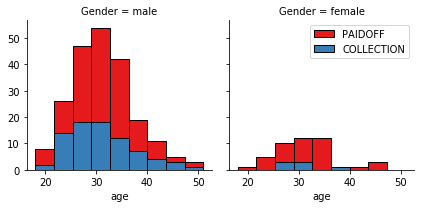

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

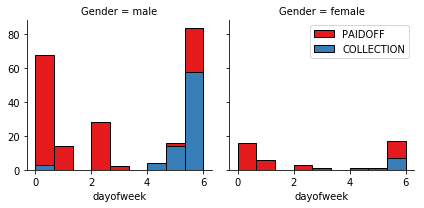

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Train Test Split


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
print("shape of independent and dependent variable for training i.e %s  %s" %(X_train.shape,y_train.shape))
print("shape of independent and dependent variable for testing i.e %s  %s" %(X_test.shape,y_test.shape))

shape of independent and dependent variable for training i.e (259, 8)  (259,)
shape of independent and dependent variable for testing i.e (87, 8)  (87,)


# Function for showing confusion metrics

In [43]:
from sklearn import metrics
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
#import scikitplot as skplt
import scikitplot as skplt

    
def model_metrics(y_test,y_pred):
    # Prints confusion matrix
    print("Values : " + str(np.unique(y_pred)))

    skplt.metrics.plot_confusion_matrix(y_test,y_pred,text_fontsize="small",figsize=(6,4))
    plt.show()
    print('----Classification Report----')
    print()
    print(classification_report(y_test,y_pred))

# Classification 

In [22]:
sklearn.__version__

'0.20.3'

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

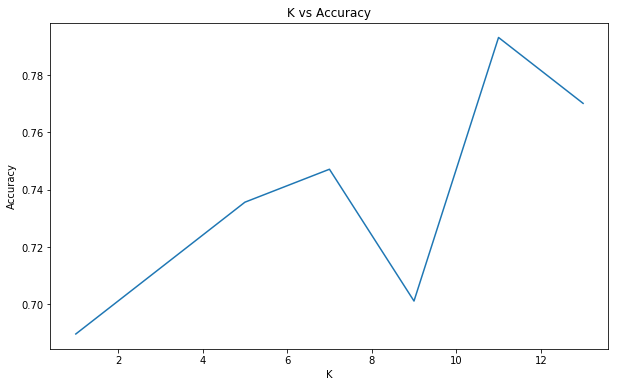

In [33]:
knnacc_scores = []
for i in range(1,15,2):
    knnClassifier = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    prediction = knnClassifier.predict(X_test)
    knnacc_scores.append(metrics.accuracy_score(y_test,prediction))
    
    
#plotting k vs accuracy graph for visualizing best k
plt.figure(figsize = (10,6))
plt.plot(range(1,15,2),knnacc_scores)
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
    
    

In [25]:
#We can clearly see that best accuracy is with k=11
knnClassifier = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
y_pred_knn = knnClassifier.predict(X_test)

Values : ['COLLECTION' 'PAIDOFF']


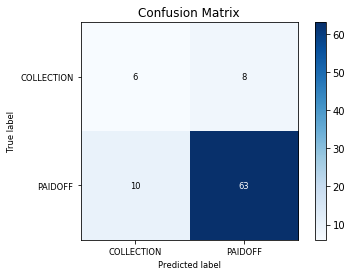

----Classification Report----

              precision    recall  f1-score   support

  COLLECTION       0.38      0.43      0.40        14
     PAIDOFF       0.89      0.86      0.88        73

   micro avg       0.79      0.79      0.79        87
   macro avg       0.63      0.65      0.64        87
weighted avg       0.80      0.79      0.80        87

Accuracy for training data : 0.7644787644787645
Accuracy for testing data : 0.7931034482758621
jaccard similarity score : 0.7931034482758621
f1 score macro : 0.6375
f1 score micro : 0.7931034482758621


In [44]:
#plotting confusion matrix and calculating acccuraies via various measures
model_metrics(y_test,y_pred_knn)

print("Accuracy for training data :", metrics.accuracy_score(y_train, knnClassifier.predict(X_train)))
print("Accuracy for testing data :", metrics.accuracy_score(y_test, y_pred_knn))


print ("jaccard similarity score :", jaccard_similarity_score(y_test, y_pred_knn))
print ("f1 score macro :", f1_score(y_test, y_pred_knn, average='macro') )
print ("f1 score micro :", f1_score(y_test, y_pred_knn, average='micro') )

# Decision Tree

In [27]:
from sklearn.ensemble import RandomForestClassifier


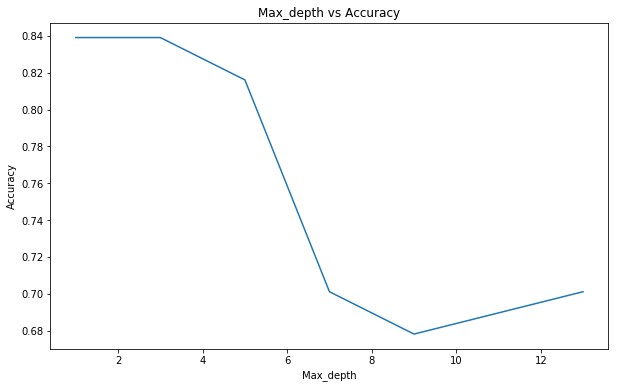

In [29]:
dtacc_scores = []
for i in range(1,15,2):
    dtclassifier = RandomForestClassifier(n_estimators=100 , max_depth=i,random_state=0).fit(X_train,y_train)
    prediction = dtclassifier.predict(X_test)
    dtacc_scores.append(metrics.accuracy_score(y_test,prediction))
    
    
#plotting k vs accuracy graph for visualizing best k
plt.figure(figsize = (10,6))
plt.plot(range(1,15,2),dtacc_scores)
plt.title('Max_depth vs Accuracy')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()

Values : ['COLLECTION' 'PAIDOFF']


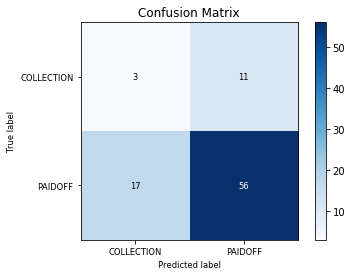

----Classification Report----

              precision    recall  f1-score   support

  COLLECTION       0.15      0.21      0.18        14
     PAIDOFF       0.84      0.77      0.80        73

   micro avg       0.68      0.68      0.68        87
   macro avg       0.49      0.49      0.49        87
weighted avg       0.73      0.68      0.70        87



In [49]:
#we clearly see that best maxdepth value is 9
dtclassifier = RandomForestClassifier(n_estimators=100, max_depth=9,random_state=0).fit(X_train,y_train)

y_pred_dt = dtclassifier.predict(X_test)
#dt_acc_scores.append(metrics.accuracy_score(y_test, y_pred_dt))

model_metrics(y_test,y_pred_dt)

In [50]:
print("Accuracy for training data :", metrics.accuracy_score(y_train, dtclassifier.predict(X_train)))
print("Accuracy for testing data :", metrics.accuracy_score(y_test, y_pred_dt))


print ("jaccard similarity score :", jaccard_similarity_score(y_test, y_pred_dt))
print ("f1 score macro :", f1_score(y_test, y_pred_dt, average='macro') )
print ("f1 score micro :", f1_score(y_test, y_pred_dt, average='micro') )

Accuracy for training data : 0.9111969111969112
Accuracy for testing data : 0.6781609195402298
jaccard similarity score : 0.6781609195402298
f1 score macro : 0.4882352941176471
f1 score micro : 0.6781609195402298


# Support Vector Machine

In [51]:
from sklearn.svm import SVC

In [54]:
svmclassifier = SVC(kernel='rbf', gamma= 'auto') 
svmclassifier.fit(X_train,y_train)
y_pred_svm = svmclassifier.predict(X_test)


Values : ['COLLECTION' 'PAIDOFF']


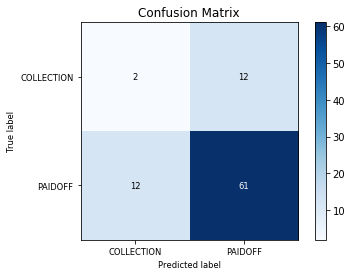

----Classification Report----

              precision    recall  f1-score   support

  COLLECTION       0.14      0.14      0.14        14
     PAIDOFF       0.84      0.84      0.84        73

   micro avg       0.72      0.72      0.72        87
   macro avg       0.49      0.49      0.49        87
weighted avg       0.72      0.72      0.72        87



In [55]:
model_metrics(y_test,y_pred_svm)

In [56]:
print("Accuracy for training data :", metrics.accuracy_score(y_train, svmclassifier.predict(X_train)))
print("Accuracy for testing data :", metrics.accuracy_score(y_test, y_pred_svm))


print ("jaccard similarity score :", jaccard_similarity_score(y_test, y_pred_svm))
print ("f1 score macro :", f1_score(y_test, y_pred_svm, average='macro') )
print ("f1 score micro :", f1_score(y_test, y_pred_svm, average='micro') )

Accuracy for training data : 0.7837837837837838
Accuracy for testing data : 0.7241379310344828
jaccard similarity score : 0.7241379310344828
f1 score macro : 0.4892367906066536
f1 score micro : 0.7241379310344829


# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lrclassifier = LogisticRegression(random_state=0,multi_class='auto',solver='lbfgs',max_iter=1000)
lrclassifier.fit(X_train, y_train)
y_pred_lr = lrclassifier.predict(X_test)

Values : ['COLLECTION' 'PAIDOFF']


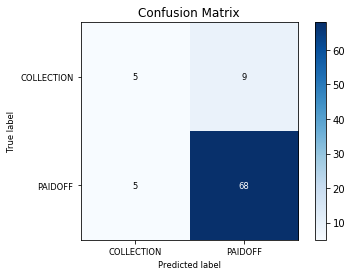

----Classification Report----

              precision    recall  f1-score   support

  COLLECTION       0.50      0.36      0.42        14
     PAIDOFF       0.88      0.93      0.91        73

   micro avg       0.84      0.84      0.84        87
   macro avg       0.69      0.64      0.66        87
weighted avg       0.82      0.84      0.83        87



In [59]:
model_metrics(y_test,y_pred_lr)

In [61]:
print("Accuracy for training data :", metrics.accuracy_score(y_train, lrclassifier.predict(X_train)))
print("Accuracy for testing data :", metrics.accuracy_score(y_test, y_pred_lr))


print ("jaccard similarity score :", jaccard_similarity_score(y_test, y_pred_lr))
print ("f1 score macro :", f1_score(y_test, y_pred_lr, average='macro') )
print ("f1 score micro :", f1_score(y_test, y_pred_lr, average='micro') )

Accuracy for training data : 0.7142857142857143
Accuracy for testing data : 0.8390804597701149
jaccard similarity score : 0.8390804597701149
f1 score macro : 0.6616666666666666
f1 score micro : 0.8390804597701149


# Model Evaluation using Test set

In [62]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [63]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-05-06 17:35:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-05-06 17:35:44 (332 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [64]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [65]:
#steps to solve
#Step 1 - convert to date format
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

#Step 2 - Get day of week
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

#Step 3 - Weekend or not: Feature binarization to set a threshold values less then day 4 
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#Gender
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# Education
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X = Feature

#Scale X
Scaled_X_Test = preprocessing.StandardScaler().fit(X).transform(X)

#Get y
Scaled_y_test = test_df['loan_status'].values

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:22: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


Classifier:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')
Values : ['COLLECTION' 'PAIDOFF']


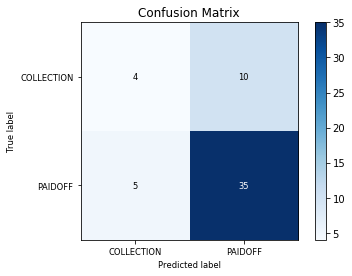

----Classification Report----

              precision    recall  f1-score   support

  COLLECTION       0.44      0.29      0.35        14
     PAIDOFF       0.78      0.88      0.82        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.61      0.58      0.59        54
weighted avg       0.69      0.72      0.70        54

----------------------------------------

Classifier:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Values : ['COLLECTION' 'PAIDOFF']


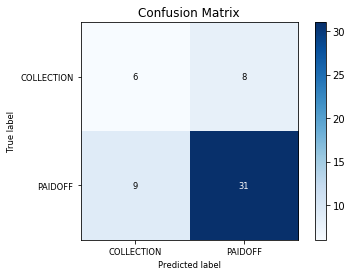

----Classification Report----

              precision    recall  f1-score   support

  COLLECTION       0.40      0.43      0.41        14
     PAIDOFF       0.79      0.78      0.78        40

   micro avg       0.69      0.69      0.69        54
   macro avg       0.60      0.60      0.60        54
weighted avg       0.69      0.69      0.69        54

----------------------------------------

Classifier:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Values : ['COLLECTION' 'PAIDOFF']


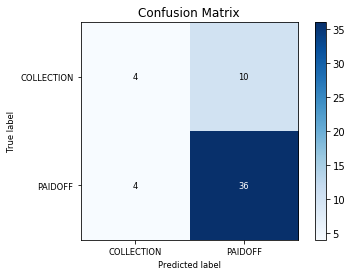

----Classification Report----

              precision    recall  f1-score   support

  COLLECTION       0.50      0.29      0.36        14
     PAIDOFF       0.78      0.90      0.84        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.64      0.59      0.60        54
weighted avg       0.71      0.74      0.71        54

----------------------------------------

Classifier:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Values : ['COLLECTION' 'PAIDOFF']


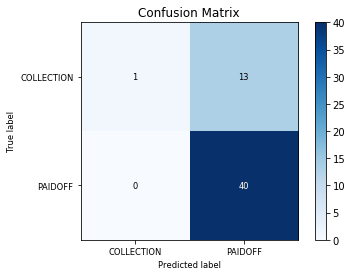

----Classification Report----

              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.13        14
     PAIDOFF       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54

----------------------------------------



In [74]:
#making list of all classifier
model_list = []
C1 = {'Classifier': knnClassifier, 'Model_name': "KNN"}
model_list.append(C1)
C2 = {'Classifier': dtclassifier, 'Model_name': "Random Forest"}
model_list.append(C2)
C3 = {'Classifier': svmclassifier, 'Model_name': "SVM"}
model_list.append(C3)
C4 = {'Classifier': lrclassifier, 'Model_name': "Logistic Regression"}
model_list.append(C4)

Jaccard_Scores = []
f1_macro = []
Log_Loss = []

for model in model_list:
    y_pred_2 = model['Classifier'].predict(Scaled_X_Test)

    print("Classifier: ", model['Classifier'])
    model_metrics(Scaled_y_test,y_pred_2)

    Jaccard_Scores.append(jaccard_similarity_score(Scaled_y_test,y_pred_2))
    f1_macro.append(f1_score(Scaled_y_test,y_pred_2, average='macro') )
    if (model['Model_name'] == "Logistic Regression"):
        y_pred_2_prob = lrclassifier.predict_proba(Scaled_X_Test)
        Log_Loss.append(log_loss(Scaled_y_test,y_pred_2_prob))
    else:
        Log_Loss.append("NA")
    print("----------------------------------------\n")

In [75]:
   
df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard_Scores, 'F1-score': f1_macro, 'LogLoss': Log_Loss}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
Report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.722222,0.585678,NA
1,Decistion Tree,0.685185,0.599302,NA
2,SVM,0.740741,0.600423,NA
3,LogisticRegression,0.759259,0.496774,0.477023


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>